# 1次元場PDE - 基礎編 -

時間だけでなく位置$x$に依存する偏微分方程式を考える．　$x$に対する空間の差分化さえできれば．後は連立ODEと同じになる．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

## 拡散方程式
熱拡散の問題を考えよう．
一次元場の熱保存式は，次の式で書ける
$$
\frac{\partial \theta}{\partial t}= \alpha\frac{\partial^2 \theta}{\partial x^2}
$$
$x$の空間差分をとる．
$$
\frac{\partial \theta^n}{\partial t}= - \alpha\frac{\theta^{n+1}-2\theta^{n}+\theta^{n-1}}{\Delta x^2}
$$
$\theta=1$ at $x=0,1$を境界として，$x$が$[0,1]$の範囲を考える．

In [148]:
nx = 100
x  = np.linspace(0.0,1.0,nx) 
θ  = np.zeros_like(x)
θ[0] = θ[-1] = 1.
Δx = 1.0/(nx-1)
α = 0.25
init   = θ
t_span = [0,1]
t_eval = np.linspace(*t_span,20) # time for sampling
def diffusion(t,θ,α,Δx):
    dθ = α * np.diff(θ,2)/(Δx**2)
    return np.hstack([0.0,dθ,0.0])
sol = solve_ivp(diffusion,t_span,init,method="RK45",t_eval=t_eval,args=(α,Δx))

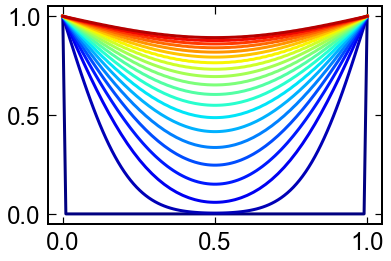

In [149]:
cmap = plt.get_cmap('jet')
Np = len(sol.t)
for i in range(Np):
    plt.plot(x,sol.y[:,i],c=cmap(i/Np))

## 移流方程式
矩形波の進行問題を考えよう．
等速流一次元場の質量保存式は，次の式で書ける
$$
\frac{\partial \rho}{\partial t}+ v_x\frac{\partial \rho}{\partial x}=0
$$

この差分の取り扱いは結構難しい．ここでは$x$の２次後進差分をとり，許容相対誤差(rtol)を小さくしてみる．
$$
\frac{\partial \rho^n}{\partial t}= -v_x\frac{3\rho^{n}-4\rho^{n-1}+\rho^{n-2}}{2\Delta x}
$$

$v_x=1$を一定値として，$x$が$[0,1]$の範囲を考える．初期条件は,$\rho(0.0<x<0.2)=1$　これ以外で$0$とする．

In [177]:
nx = 1000
vx = 0.8
x  = np.linspace(0.0,1.0,nx) 
ρ  = np.where((0.1<x)&(x<0.2),1.0,0.0)
Δx = 1.0/(nx-1)
init   = ρ
t_span = [0,1]
t_eval = np.linspace(*t_span,6) # time for sampling
def advection(t,ρ,vx,Δx):
    dρ = -vx * np.convolve(ρ,[3.0,-4.0,1.0],'valid')/(2*Δx)
    return np.hstack([0.0,0.0,dρ])
sol = solve_ivp(advection,t_span,init,method="RK45",t_eval=t_eval,args=(vx,Δx),rtol=1e-5)

少し乱れているが，進行する様子が観察できる．ちなみに前進差分で計算すると簡単に発散し，大変なことになる(なった)．

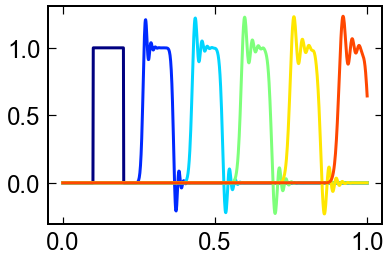

In [181]:
cmap = plt.get_cmap('jet')
Np = len(sol.t)
for i in range(Np):
    plt.plot(x,sol.y[:,i],c=cmap(i/Np))

## 波動方程式
時間方向の二階微分が関係する楕円方程式を考えよう．
$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
$$

ここで，ある$x$における$u=u^n$について$u, u'=\frac{\partial u}{\partial t}$に対する2本のODEが書ける

$$
\begin{eqnarray}
    \frac{\partial u }{\partial t}&&= u'\\
    \frac{\partial u'}{\partial t}&&= c^2\frac{u^{n+1}-2u+u^{n-1}}{\Delta x^2}
\end{eqnarray}
$$
$x=0$を固定端$u=0$,$x=1$を自由端$u'=0$として,区間$[0,1]$にある正弦波形の時間発展を見てみよう．


In [15]:
nx = 100
x  = np.linspace(0.0,1.0,nx) 
u  = np.sin(2.0*np.pi*x)
du = np.cos(3.0*np.pi*x)
Δx = 1.0/(nx-1)
c2 = 0.05
init   = np.hstack([u,du])
t_span = [0,1]
t_eval = np.linspace(*t_span,50) # time for sampling
def wave(t,U,c2,Δx):
    u,du = U[:nx],U[nx:]
    u[0] = u[-1] = 0.0
    ddu = c2 * np.diff(du,2)/(Δx**2)
    return np.hstack([du,0.0,ddu,0.0])
sol = solve_ivp(wave,t_span,init,method="RK45",t_eval=t_eval,args=(c2,Δx))

u[0..n-1],du[0..n-1]をまとめて扱うのがコツ．
上の画像は$u$，下の画像は$u'$の時間発展を表している．

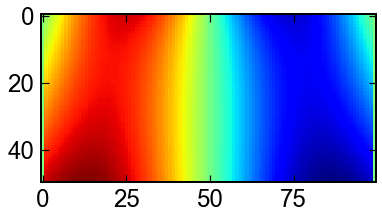

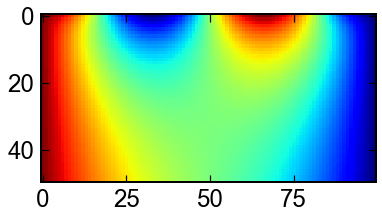

In [16]:
fig,ax = plt.subplots()
ax.imshow(sol.y.T[:,:nx],cmap='jet')
fig,ax = plt.subplots()
ax.imshow(sol.y.T[:,nx:],cmap='jet')